In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to your SQLite database
conn = sqlite3.connect("../data/calendar_events.db")

# Load your .sql file
with open("../sql/calendar_analysis.sql", "r") as file:
    sql_script = file.read()

# Split queries by semicolon and clean
queries = [q.strip() for q in sql_script.strip().split(";") if q.strip()]


In [4]:
df_preview = pd.read_sql(queries[0], conn)
df_preview.head()

,event_id,user_id,title,start_time,end_time,status,description,location,event_type,with_whom
0,1000,1,Project Work - Implement module features,2024-09-01 10:00:00,2024-09-01 11:47:00,completed,Implement module features,Google Meet,Project Work,None
1,1001,1,Break - Coffee break,2024-09-01 12:00:00,2024-09-01 12:17:00,completed,Coffee break,Zoom,Break,None
2,1002,1,Admin - Update invoices,2024-09-01 13:00:00,2024-09-01 13:27:00,completed,Update invoices,Cafe,Admin,None
3,1003,1,Email & Communication - Follow up on proposals,2024-09-01 14:00:00,2024-09-01 14:28:00,completed,Follow up on proposals,Zoom,Email & Communication,None
4,1004,1,Project Work - Implement module features,2024-09-02 08:00:00,2024-09-02 09:21:00,completed,Implement module features,Office,Project Work,None


C:\Users\DELL\AppData\Local\Temp\ipykernel_15916\2618212771.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_event_time, x="event_type", y="total_minutes", palette="viridis")


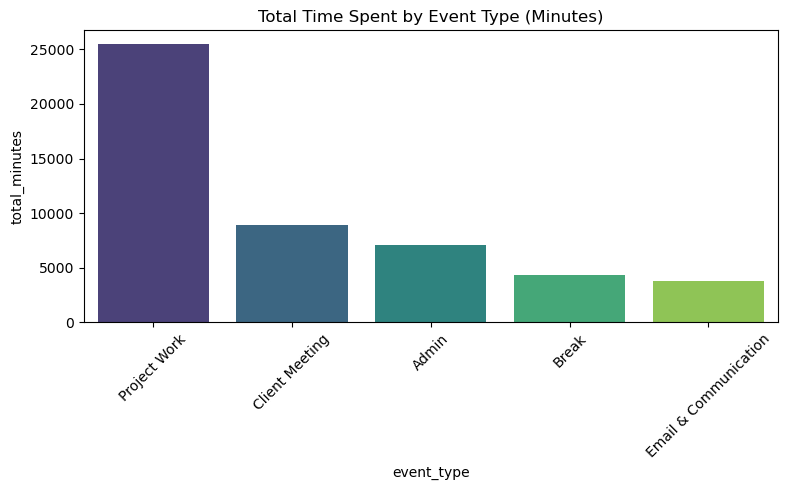

In [5]:
df_event_time = pd.read_sql(queries[1], conn)

plt.figure(figsize=(8, 5))
sns.barplot(data=df_event_time, x="event_type", y="total_minutes", palette="viridis")
plt.title("Total Time Spent by Event Type (Minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



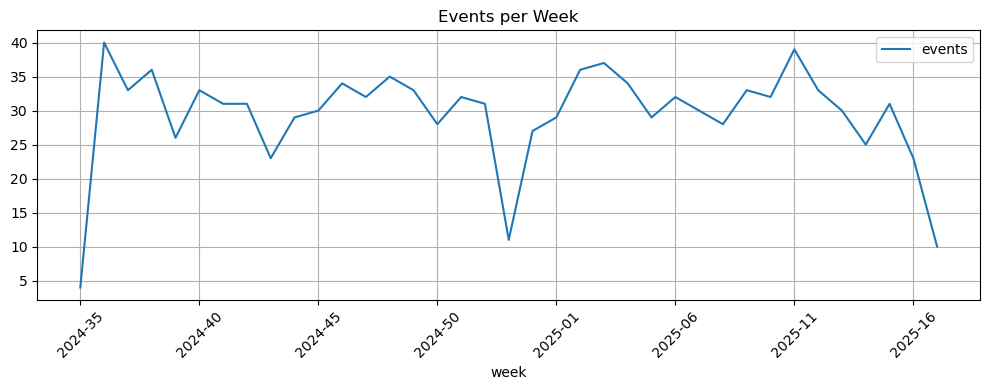

In [6]:
df_weekly = pd.read_sql(queries[2], conn)

df_weekly.plot(x="week", y="events", kind="line", figsize=(10, 4), title="Events per Week")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
df_focus = pd.read_sql(queries[3], conn)
print(f"🧠 Focus Time (Project Work): {df_focus.iloc[0]['focus_percent']}%")


🧠 Focus Time (Project Work): 51.32%


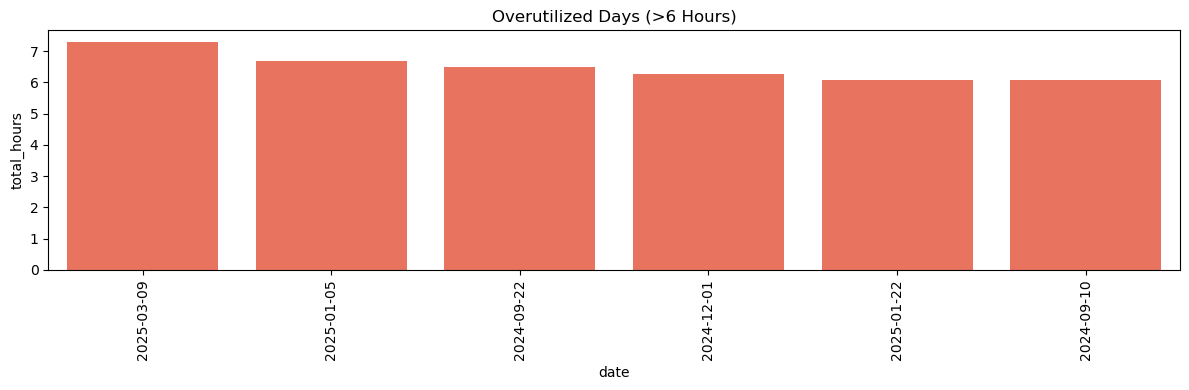

In [8]:
df_overutilized = pd.read_sql(queries[4], conn)

plt.figure(figsize=(12, 4))
sns.barplot(data=df_overutilized, x="date", y="total_hours", color="tomato")
plt.title("Overutilized Days (>6 Hours)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


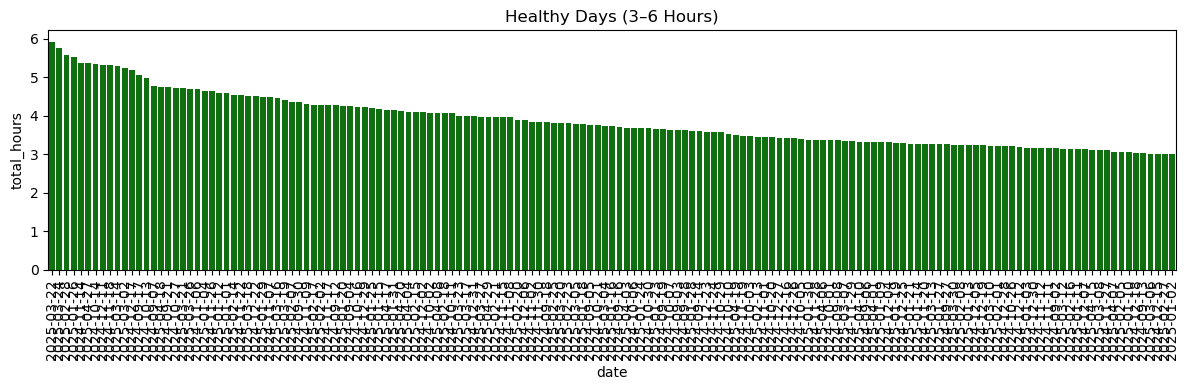

In [9]:
df_healthy = pd.read_sql(queries[5], conn)

plt.figure(figsize=(12, 4))
sns.barplot(data=df_healthy, x="date", y="total_hours", color="green")
plt.title("Healthy Days (3–6 Hours)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


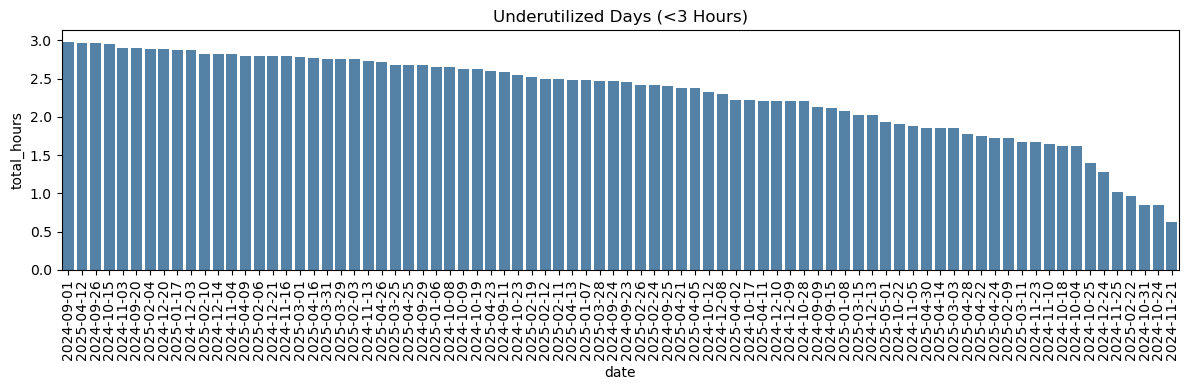

In [10]:
df_underutilized = pd.read_sql(queries[6], conn)

plt.figure(figsize=(12, 4))
sns.barplot(data=df_underutilized, x="date", y="total_hours", color="steelblue")
plt.title("Underutilized Days (<3 Hours)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


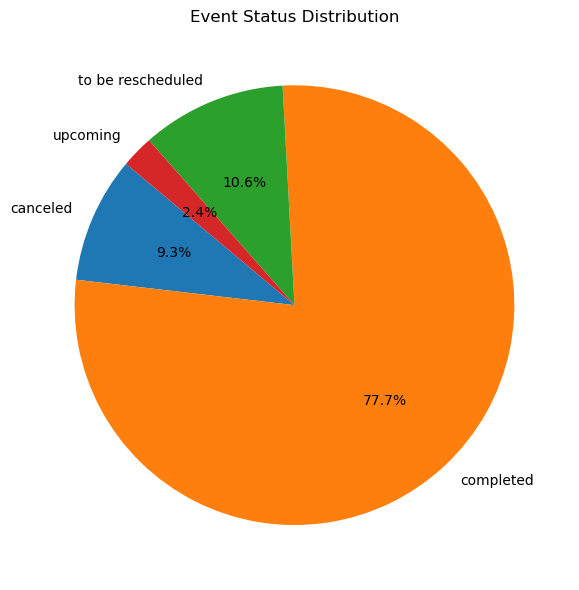

In [11]:
df_status = pd.read_sql(queries[7], conn)

plt.figure(figsize=(6, 6))
plt.pie(df_status["count"], labels=df_status["status"], autopct="%1.1f%%", startangle=140)
plt.title("Event Status Distribution")
plt.tight_layout()
plt.show()


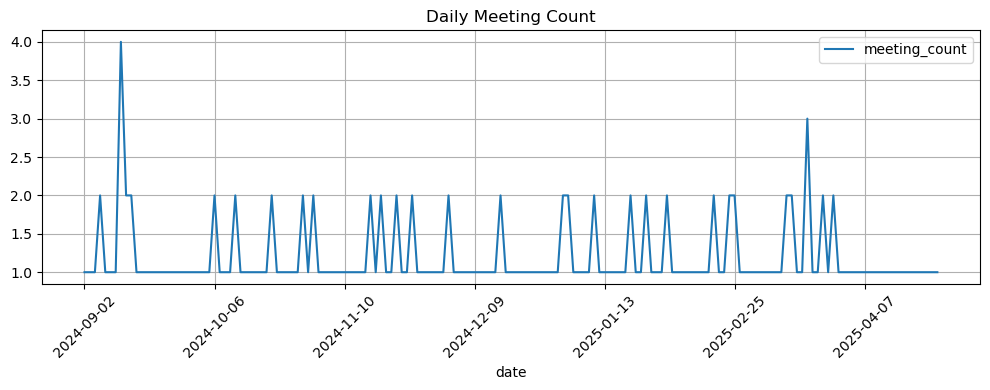

In [12]:
df_meeting_count = pd.read_sql(queries[8], conn)

df_meeting_count.plot(x="date", y="meeting_count", kind="line", figsize=(10, 4), title="Daily Meeting Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_15916\1025512432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_billed, x="status", y="total_hours", palette="coolwarm")


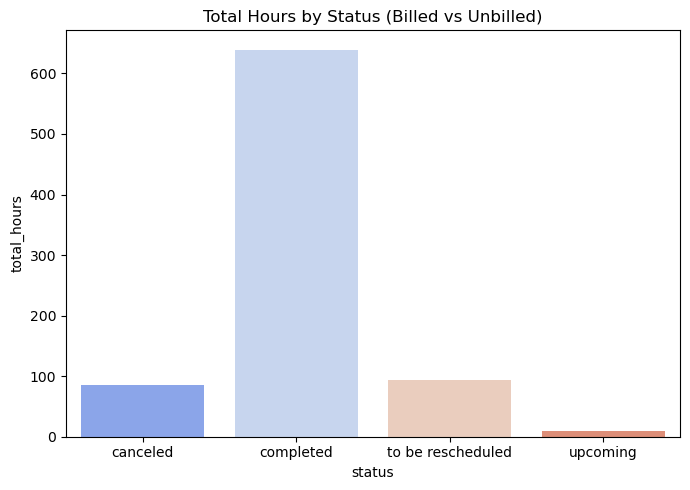

In [13]:
df_billed = pd.read_sql(queries[9], conn)

plt.figure(figsize=(7, 5))
sns.barplot(data=df_billed, x="status", y="total_hours", palette="coolwarm")
plt.title("Total Hours by Status (Billed vs Unbilled)")
plt.tight_layout()
plt.show()


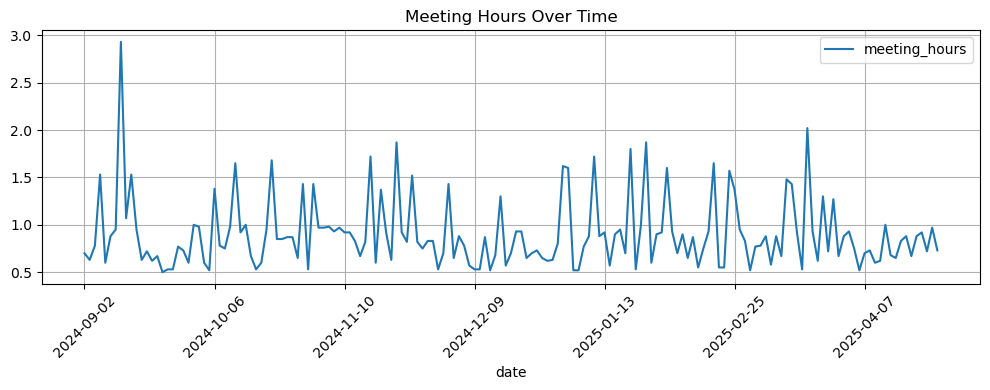

In [14]:
df_meeting_hours = pd.read_sql(queries[10], conn)

df_meeting_hours.plot(x="date", y="meeting_hours", kind="line", figsize=(10, 4), title="Meeting Hours Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


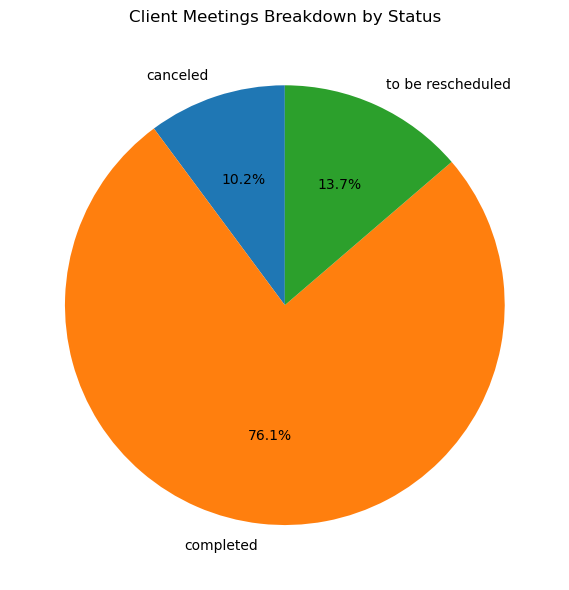

In [15]:
df_meeting_status = pd.read_sql(queries[11], conn)

plt.figure(figsize=(6, 6))
plt.pie(df_meeting_status["meeting_count"], labels=df_meeting_status["status"], autopct="%1.1f%%", startangle=90)
plt.title("Client Meetings Breakdown by Status")
plt.tight_layout()
plt.show()


In [16]:
selected_date = "2024-09-01"  # You can change this dynamically later

q_taskline = queries[12].replace("2024-09-01", selected_date)
df_taskline = pd.read_sql(q_taskline, conn)

df_taskline


,title,start_time,end_time,event_type,status
0,Project Work - Implement module features,2024-09-01 10:00:00,2024-09-01 11:47:00,Project Work,completed
1,Break - Coffee break,2024-09-01 12:00:00,2024-09-01 12:17:00,Break,completed
2,Admin - Update invoices,2024-09-01 13:00:00,2024-09-01 13:27:00,Admin,completed
3,Email & Communication - Follow up on proposals,2024-09-01 14:00:00,2024-09-01 14:28:00,Email & Communication,completed


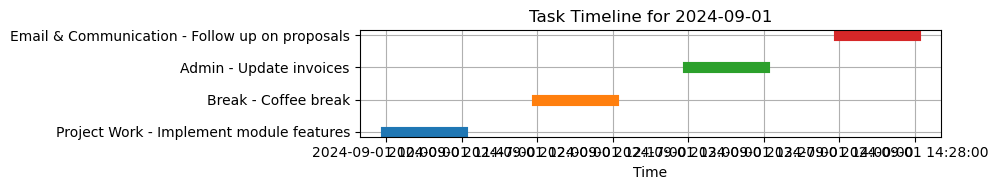

In [17]:
plt.figure(figsize=(10, 2))
for idx, row in df_taskline.iterrows():
    plt.plot([row["start_time"], row["end_time"]], [idx, idx], linewidth=8)
plt.yticks(range(len(df_taskline)), df_taskline["title"])
plt.xlabel("Time")
plt.title(f"Task Timeline for {selected_date}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
conn.close()


In [19]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Connect to your SQLite database
conn = sqlite3.connect("../data/calendar_events.db")

# Load SQL file
with open("../sql/calendar_analysis.sql", "r") as file:
    sql_script = file.read()

queries = [q.strip() for q in sql_script.strip().split(";") if q.strip()]


In [20]:
# Fetch available dates
all_dates = pd.read_sql("SELECT DISTINCT DATE(start_time) as date FROM calendar_events ORDER BY date;", conn)
date_options = all_dates["date"].tolist()


In [21]:
import ipywidgets as widgets
from IPython.display import display

# Get all available dates from your dataset
all_dates = pd.read_sql("SELECT DISTINCT DATE(start_time) as date FROM calendar_events ORDER BY date;", conn)
date_options = all_dates["date"].tolist()

# Create a dropdown filter
date_picker = widgets.Dropdown(
    options=date_options,
    description='📅 Date:',
    value=date_options[0]
)

def plot_taskline_for_date(selected_date):
    q = queries[12].replace("2024-09-01", selected_date)
    df_day = pd.read_sql(q, conn)

    if df_day.empty:
        print(f"No events found on {selected_date}")
        return

    # Show task timeline
    plt.figure(figsize=(10, 2))
    for idx, row in df_day.iterrows():
        plt.plot([row["start_time"], row["end_time"]], [idx, idx], linewidth=8)
    plt.yticks(range(len(df_day)), df_day["title"])
    plt.xlabel("Time")
    plt.title(f"Task Timeline for {selected_date}")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Connect the dropdown to the plot function
widgets.interact(plot_taskline_for_date, selected_date=date_picker);


interactive(children=(Dropdown(description='📅 Date:', options=('2024-09-01', '2024-09-02', '2024-09-03', '2024…